## Calculation and Tests for the Chamfer the cross hole

First caculation of the tool-path

(-3.333333333333333,
 3.333333333333333,
 -2.998395352255527,
 3.668271314411139,
 -2.5,
 2.5)

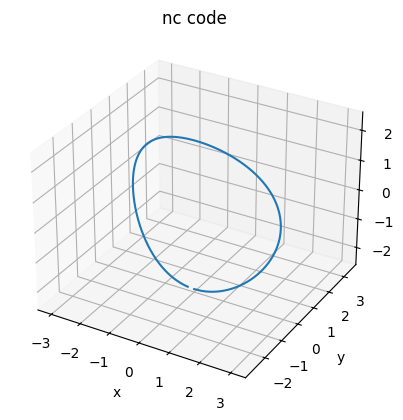

In [37]:
import matplotlib.pyplot as plt
import numpy as np

R_Hole = 2.5
R_Bar = 5.0

h_bar = np.sqrt(R_Bar**2-R_Hole**2)
x_ = np.arange(-R_Hole, R_Hole,0.01)
y_ = np.around(np.sqrt(R_Hole**2-x_**2),8)
z_ = x_-x_
fig = plt.figure(1)
x2 = np.append(x_,-x_,axis=0)
y2 = np.append(y_,-y_,axis=0)
z2 = x2-x2

y_bar = np.around(np.sqrt(R_Bar**2-x_**2),5)
y_bar = y_bar-h_bar

z2 = np.append(y_bar,y_bar,axis=0)

ax = fig.add_subplot(111, projection='3d')
ax.plot(y2,z2, x2, label='parametric curve')
plt.title('nc code')
plt.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.axis('equal')


Check the tool-path of the tool

 CNCErrorof ERROR_IN_A_CHANAL 1 at 
 NCCanalStarErrorsof CODE_ERRORin LINE => 120 at 

runtime 0.15385164807134505
runtimeplot 0.15385164807134505
Alarm Messages
___________________________



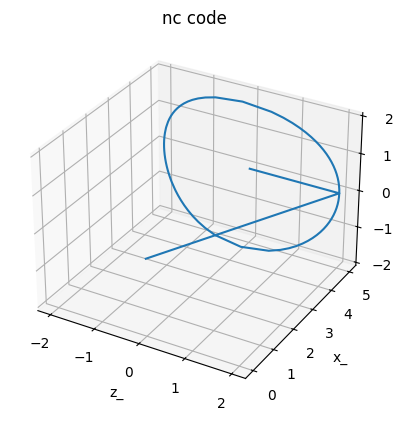

In [38]:
from NCAnalyzer import NCAnalyzer
import matplotlib.pyplot as plt
from NCAnalyzer.Domain.NCControl.FanucStarNCControl.CNCControlFanucStarLathe import CNCControlFanucStarLathe
import NCAnalyzer.fileHandler as file_Handler
from NCAnalyzer.technicalService.GCodeGroups import GGroup00, GGroup01, GGroup02, GGroup05, GGroup07, GGroup08, \
    GGroup09, GGroup10, GGroup12, GGroup16, GGroup20, GGroup21, GGroupSTAR
from NCAnalyzer.technicalService.NCAnalyserErrorsMessageCreator import Languages, NCAnalyserErrorsMessageCreator
from NCAnalyzer.technicalService.NCState import NCState
from NCAnalyzer.technicalService.OutoutManager import OutputManager, PrinterTyp
from NCAnalyzer.technicalService.Point import Point
from NCAnalyzer import NCAnalyzer


# Create a Maschine
init_nc_state = NCState(
    GGroup00.G11, GGroup01.G01, GGroup02.G97, GGroup05.G99, GGroup07.G40, GGroup08.G26, GGroup09.G23,
    GGroup10.G80, GGroup12.G67, GGroup16.G18, GGroup20.G251, GGroup21.G113, GGroupSTAR.NONE,
    a_axis_multiplication=1.0, b_axis_multiplication=1.0,
    c_axis_multiplication=1.0, x_axis_multiplication=1.0, y_axis_multiplication=1.0, z_axis_multiplication=1.0,
    dddp_set={}, calc_step_in_s=1.0, feed_rate=2.0, line_number=None, loop_command=[], tool_radius=0.0,
    tool_quadrant=0, m_code=None, parameters={}, spindle_rotation=3000, a_axis_override_feed=10000,
    b_axis_override_feed=10000, c_axis_override_feed=10000,
    x_axis_override_feed=10000, y_axis_override_feed=10000, z_axis_override_feed=10000, polar_interpolate_axis='Y',
    coordinate_system_direction=Point(1.0, 1.0, -1.0, 1.0, 1.0, 1.0))
program1 = file_Handler.get_program("O00005")


cnc_control = CNCControlFanucStarLathe(count_of_canals=1,canal_names=["test"], init_nc_states=[init_nc_state])
message_creator = NCAnalyserErrorsMessageCreator(Languages.english)
outputManager =  OutputManager.instance(PrinterTyp.CLI)
nc_analyzer = NCAnalyzer.NCAnalyzer(outputManager ,cnc_control,message_creator)
#Caculation toolpath
plot = nc_analyzer.get_Syncro_plot([program1[0]],True)


print("runtime "+ str(nc_analyzer.get_cacluated_runtime()))
# PLOT toolPath
runtime = 0.0
    
x = []
y = []
z = []
for line in plot[0]["plot"]:
    x.extend(line['x'])
    y.extend(line['y'])
    z.extend(line['z'])


    runtime += float(line['t'])
print("runtimeplot "+ str(runtime))
print("Alarm Messages")
print("___________________________")
print(outputManager.get_message_stack())    
    # Plot with mathplotlib
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')    
ax.plot(z, x, y, label='parametric curve')
plt.title('nc code')
ax.set_xlabel('z_')
ax.set_ylabel('x_')
ax.set_zlabel('y_')
plt.show()


Verification

(-3.446581987385204,
 3.446581987385204,
 -3.446581987385204,
 3.446581987385204,
 0.0,
 5.169872981077806)

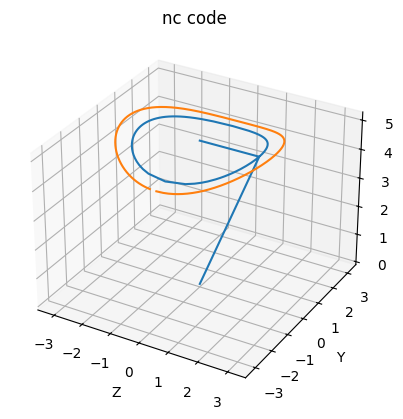

In [39]:

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.plot(z, y, x, label='parametric curve')
z3 = z2 + 4.5
ax.plot(y2,x2, z3, label='parametric curve')
    
plt.title('nc code')
plt.axis('equal')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')

plt.axis('equal')